#Importing Files 

In [2]:
import numpy
import cv2
import scipy.linalg
from google.colab.patches import cv2_imshow
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
import pandas as pd
from random import randint
import torch.nn.functional as F 
import random
from google.colab import drive
from scipy.linalg import sqrtm 
drive.mount('/content/drive')

Mounted at /content/drive


#Loading Unordered Data 

In [3]:
df = pd.read_csv('/content/drive/MyDrive/intelligent_font_files/CSV_files/mygdatasheet12_ordered_data.csv')
df.drop(df.columns[[0]], axis = 1, inplace = True)
print(df)

      previous alphabet current alphabet next alphabet  \
0                                      f             o   
1                     f                o             l   
2                     o                l             l   
3                     l                l             o   
4                     l                o             w   
...                 ...              ...           ...   
12001                                  f             u   
12002                 f                u             t   
12003                 u                t             r   
12004                 t                r             e   
12005                 r                e                 

                                     spacial information  \
0                    [[0, 0], [39.14141414141414, 67.0]]   
1       [[0, 1], [44.83673469387755, 84.26530612244898]]   
2      [[0, 2], [40.78666666666667, 100.57333333333334]]   
3      [[0, 3], [44.61971830985915, 110.21126760563381]]   
4  

#Utility Functions 

In [6]:
def getfromdf(char):
  n = randint(0, 12005)
  while True: 
    if n > 12005: 
      n = 0
    if df.iloc[n][1] == char:  
        lis = eval(df.iloc[n][4])
        nparr = numpy.asarray(lis)
        return nparr
    n = n+1 

getfromdf('a')

from torch._C import NoneType
from statistics import mean
def getdisplacement (df, charac1, charac2): 
  # print(type(charac1))
  instances = 0
  rowdifflist = [0]
  rowdifflist2 = [0]
  coldifflist = [13]
  for i in range(len(df)):
    if df.iloc[i][0] == charac1 and df.iloc[i][1] == charac2  : 
      listt1 = eval(df.iloc[i-1][3])
      listt2 = eval(df.iloc[i][3])
      if listt1[0][0] == listt2[0][0]:
        instances = instances +1
      
        coldifflist.append(listt2[1][1] - listt1[1][1])
        rowdifflist2.append(listt2[1][0]- listt1[1][0])
  # print([rowdifflist2, coldifflist, instances]) 
  return [mean(rowdifflist2), mean(coldifflist), instances]

print(getdisplacement(df, 'f', 'o'))



def getset(res, m, n): 
  sett = set()
  for i in range(64): 
    for j in range(64): 
      if res[i][j] < 180: 
        sett.add((i+m,j+n))
  return sett


[5.454425069859305, 14.694619990386228, 48]


#The Demo

b
h
i
r
a
m
 
g
a
d
u
 
p
e
d
d
a
 
p
i
c
h
i
 
p
u
k
u


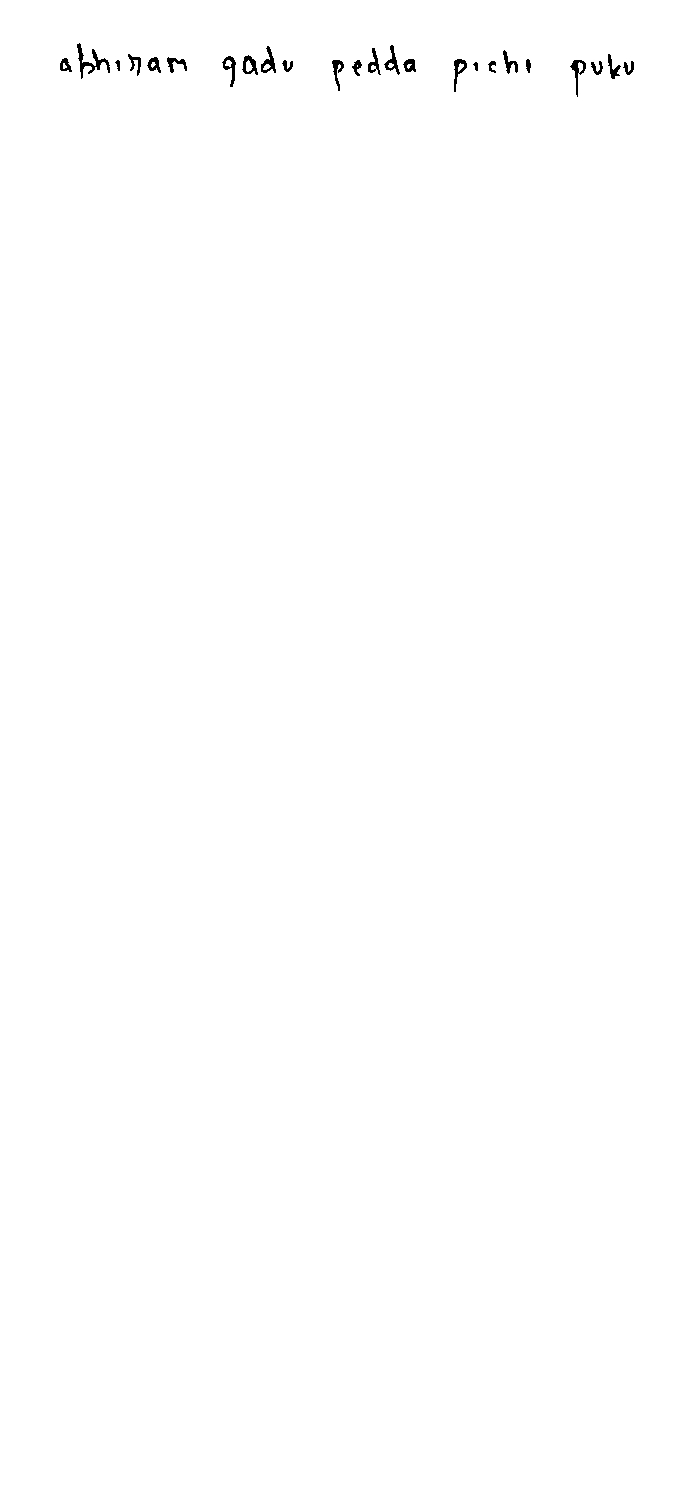

In [7]:
def ShowMeTheDemo(df,string, row, col): 
  whole = [[255 for i in range(col)] for j in range(row)]
  n = len(string)
  cur_center = [32, 32]
  current_displacement = [0, 0]
  # res =   GANchar(model, model1,opt_gen1, opt_critic1, df, string[0] )
  res = getfromdf(string[0])
  sett = getset(res, cur_center[0], cur_center[1])

  for x, y in sett:
    if int(x) in range(row) and int(y) in range(col): 
      whole[int(x)][int(y)] = 0

  displacement = [0, 15] 

  
  for i in range(1, n): 
    print(string[i])
    if string[i] == ' ': 
      cur_center[1] = cur_center[1] + displacement[1] + 0
      continue 
    
    if cur_center[1]> col - 100: 
      cur_center[0] =   cur_center[0] + 64
      cur_center[1] = 32
      res = getfromdf(string[i])
      sett = getset(res, cur_center[0], cur_center[1])
      for x, y in sett:
         if int(x) in range(row) and int(y) in range(col): 
            whole[int(x)][int(y)] = 0
      continue 


    displacement = getdisplacement (df, string[i-1], string[i])
    cur_center[0] = cur_center[0] + displacement[0]
    cur_center[1] = cur_center[1] + displacement[1] +3
    # res =   GANchar(model, model1,opt_gen1, opt_critic1, df, string[i])
    res = getfromdf(string[i])
    sett = getset(res, cur_center[0], cur_center[1])

    for x, y in sett:
      if int(x) in range(row) and int(y) in range(col): 
        whole[int(x)][int(y)] = 0

  whole = numpy.array(whole)
  cv2_imshow(whole) 


#enter your string here
string = 'abhiram gadu pedda pichi puku'

# string = 'the man who passes the sentence should swing the sword'

ShowMeTheDemo(df, string,  1500, 700) 